# Assignment Week 15
## Group Assignment (Group 10)

#### 1. Use the finite difference method to solve the given boundary problem using step sizes $h=0.1$ and $h=0.01.$ Plot your two approximate solutions and the actual solutions on the same coordinate system.
（沈星辰）

#### (1) $x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$ over $\left[  0,1\right]$ with $x\left(  0\right)  =5$ and $x\left(  1\right)  =10,$ $x\left(  t\right) =t^{2}+4t+5$.

Solve
$$
\left[
\begin{array}
\\-2+h^2 & 1-h
\\1+h & -2+h^2 & 1-h
\\&1+h & -2+h^2 & 1-h
\\&&&\ddots
\\&&&1+h & -2+h^2 & 1-h
\\&&&&1+h&-2+h^2
\end{array}
\right]
\left[
\begin{array}
\\x_1
\\x_2
\\x_3
\\\vdots
\\x_{N-1}
\end{array}
\right]=
\left[
\begin{array}
\\h^2(t_1^2-1)-(1+h)x_0
\\h^2(t_2^2-1)
\\h^2(t_3^2-1)
\\\vdots
\\h^2(t_{N-1}^2-1)-(1-h)x_N
\end{array}
\right]
$$

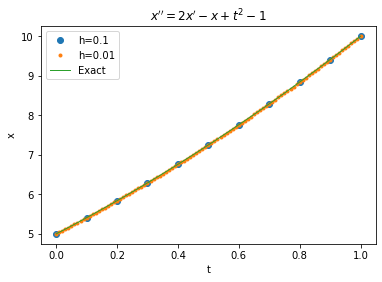

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def BVP1(h):
    xLow = 5
    xHigh = 10
    t = np.arange(0, 1+h, h)
    N = len(t) - 1
    
    A = (-2 + h**2) * np.eye(N-1) + (1 - h) * np.eye(N-1, k=1) + (1 + h) * np.eye(N-1, k=-1)
    
    b = np.array([h**2 * (t[i]**2 - 1) for i in range(1, N)])
    b[0] -= (1 + h) * xLow
    b[-1] -= (1 - h) * xHigh
    
    x = np.linalg.solve(A, b)
    x = np.append(xLow, x)
    x = np.append(x, xHigh)
    
    return t, x

t1, x1 = BVP1(h=0.1)
t2, x2 = BVP1(h=0.01)

plt.title(r'$x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$')
plt.plot(t1, x1, 'o')
plt.plot(t2, x2, '.')
t = np.linspace(0, 1, 1000)
plt.plot(t, t**2 + 4 * t + 5, '-', lw=1)
plt.legend(['h=0.1', 'h=0.01', 'Exact'])
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#### (2) $x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(
   4t^{2}\right)  )x=0$ over $\left[  1,6\right]$ with $x\left(  1\right)  =1$ and $x\left(  6\right)  =0,$ $x\left(  t\right)  =\dfrac{0.2913843206\cos   \left(  t\right)  +1.01299385\sin\left(  t\right)  }{\sqrt{t}}$.

Solve
$$
\left[
\begin{matrix}
-2-h^2(\frac{1}{4t_1^2}-1) & 1+\frac{h}{2t_1}
\\1-\frac{h}{2t_2} & -2-h^2(\frac{1}{4t_2^2}-1) & 1+\frac{h}{2t_2}
\\&&\ddots
\\&& 1-\frac{h}{2t_{N-2}} & -2-h^2(\frac{1}{4t_{N-2}^2}-1) & 1+\frac{h}{2t_{N-2}}
\\&&& 1-\frac{h}{2t_{N-1}} & -2-h^2(\frac{1}{4t_{N-1}^2}-1)
\end{matrix}
\right]
\left[
\begin{array}
\\x_1
\\x_2
\\x_3
\\\vdots
\\x_{N-1}
\end{array}
\right]=
\left[
\begin{matrix}
-1+\frac{h}{2t_1}
\\0
\\0
\\\vdots
\\0
\end{matrix}
\right]
$$

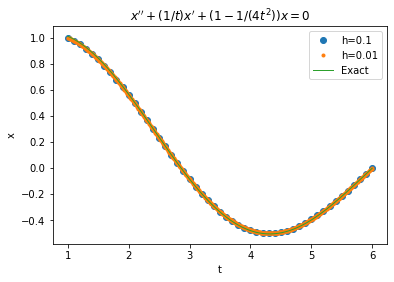

In [2]:
def BVP2(h):
    xLow = 1
    xHigh = 0
    t = np.arange(1, 6+h, h)
    N = len(t) - 1
    
    a = np.array([-2 - h**2 * (1 / 4 / t[i]**2 - 1) for i in range(1, N)])
    c = np.array([1 - h / 2 / t[i] for i in range(2, N)])
    d = np.array([1 + h / 2 / t[i] for i in range(1, N-1)])
    A = np.diag(a) + np.diag(c, -1) + np.diag(d, 1)
    
    b = np.zeros(N-1)
    b[0] = -1 + h / 2 / t[1]

    x = np.linalg.solve(A, b)
    x = np.append(xLow, x)
    x = np.append(x, xHigh)
    
    return t, x

t1, x1 = BVP2(h=0.1)
t2, x2 = BVP2(h=0.01)

plt.title(r'$x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(4t^{2}\right))x=0$')
plt.plot(t1, x1, 'o')
plt.plot(t2, x2, '.')
t = np.linspace(1, 6, 1000)
xt = (0.2913843206*np.cos(t) + 1.01299385*np.sin(t)) / np.sqrt(t)
plt.plot(t, xt, '-', lw=1)
plt.legend(['h=0.1', 'h=0.01', 'Exact'])
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#### 2. Solve the boundary value problem
$$
u_{xx} + 4u_x + e^xu = \sin(8x)
$$
#### numerically on $[-1, 1]$ with boundary conditions $u(\pm1) = 0$.

（陈张铭）

#### Shooting method:
Transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dx}\begin{pmatrix}
u\\
u_x
\end{pmatrix}
=\begin{pmatrix}
u_x\\
-4u_x-e^{x}u+sin(8x)
\end{pmatrix}
$$
thus
$$
\frac{d}{dx}\begin{pmatrix}
u_0\\
u_1
\end{pmatrix}
=\begin{pmatrix}
u_1\\
-4u_1-e^{x}u_0+sin(8x)
\end{pmatrix}
$$

0.08857250213623047


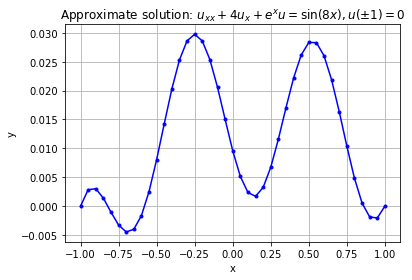

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dx = 0.05
xlow = -1
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(x_L - x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
            f_R = f_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1

    return x_M, iteration_counter

def rk4(f,y0,t,args=None): 
    # Heun's method
    dt = t[1] - t[0]
    y = np.zeros((len(t), y0.size))
    y[0] = y0
    for n in range(0, len(t) - 1):
        k1 = np.array(f(y[n], t[n], args))
        k2 = np.array(f(y[n] + dt*k1/2, t[n] + dt/2, args))
        k3 = np.array(f(y[n] + dt*k2/2, t[n] + dt/2, args))
        k4 = np.array(f(y[n] + dt*k3, t[n+1], args))        
        y[n+1] = y[n] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

def drive_func(y,x,args=None):
    dydx = [y[1], -4*y[1]-np.exp(x)*y[0]+np.sin(8*x)]
    return dydx

def solve_ode(alpha):
    y0 = 0
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y

def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

def shoot_bisection():
    tol = 1.0e-5
    alpha, iteration_counter = bisection(root_func,0,10,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    plt.plot(x, y[:,0],'b.-')
    plt.grid('on')    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Approximate solution: $u_{xx} + 4u_x + e^xu = \sin(8x), u(\pm1) = 0$')
    
if __name__ == '__main__':
    shoot_bisection()

#### 3. Apply the matrix representation method to solve Morse oscillator. The one-dimensional time-independent Schrödinger equation is given as: 
$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)
$$
#### where Morse potential is defined as
$$
V(x)=D(1-e^{-\beta x})^2
$$
#### The analytical solutions are  determined as
$$\begin{aligned}
E_n & = \hbar\omega_0\left(n+\frac{1}{2}\right)-\frac{\hbar^2\omega_0^2}{4D}\left(n+\frac{1}{2}\right)^2,\quad n=0,1,\cdots\\
\omega_0^2&=\frac{2D\beta^2}{m}
\end{aligned}$$

（沈星辰）

#### (1) Set $m=1$, $D=1$, $\beta=0.3$. Please write the script to calculate the five lowest energies numerically.  How do the results change with the increase of the size of the matrices? 

The five lowest energies (N=50) are:
[0.20088203 0.5351461  0.77941531 0.93585914 1.04663758]


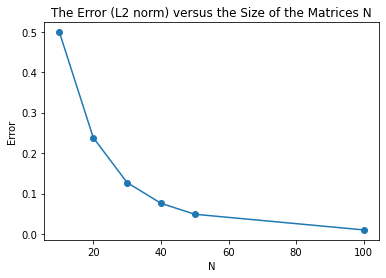

In [4]:
import numpy as np
from scipy.linalg import expm, norm, eigh
import matplotlib.pyplot as plt
%matplotlib inline

m = 1
D = 1
beta = 0.3
w0 = np.sqrt(2 * D * beta**2 / m)
s = 1 / np.sqrt(m * w0)

def Energies(N=50):
    n = np.sqrt(np.arange(1, N))

    x = s / np.sqrt(2) * (np.diag(n, -1) + np.diag(n, 1))
    p = 1j / s / np.sqrt(2) * (np.diag(n, -1) - np.diag(n, 1))

    I = np.eye(N)
    H = np.dot(p, p) / 2 / m + D * np.dot(I - expm(-beta * x), I - expm(-beta * x))
    E, v = eigh(H)
    
    return E[0: 5], v[0: 5]

E, v = Energies()
print('The five lowest energies (N=50) are:')
print(E)

E_t = np.array([w0*(i+0.5) - w0**2 / 4 / D * (i+0.5)**2 for i in range(5)])  # exact solutions

Ns = [10, 20, 30, 40, 50, 100]  # different N's
error = []  # storing errors for different N's
for N in Ns:
    E, v = Energies(N)
    error.append(norm(E-E_t))  # use L2 norm to represent errors

plt.title('The Error (L2 norm) versus the Size of the Matrices N')
plt.plot(Ns, error, 'o-')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

The results become more close to the exact solutions with the increase of the size of the matrices N.

#### (2) Please plot the corresponding wave functions of the five lowest-energy states.

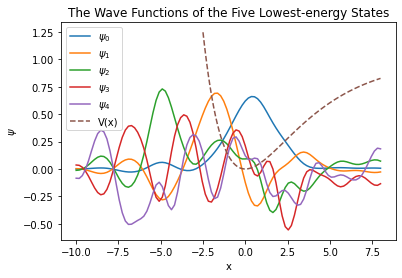

In [5]:
from scipy.special import hermite
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

N = 50
E, v = Energies(N)

# the wave functions of the harmonic oscillator, psi_h
alpha = np.sqrt(m*w0)
psi_h = lambda x: np.array([np.sqrt(alpha / 2**n / factorial(n) / np.sqrt(np.pi)) * np.exp(-alpha**2 * x**2 / 2) * hermite(n)(alpha * x) for n in range(N)])

x = np.linspace(-10, 8, 100)
for i in range(5):
    psi_m = lambda x: np.dot(v[i], psi_h(x))  # the wave functions of the Morse oscillator, psi_m
    plt.plot(x, psi_m(x).real)

x = np.linspace(-2.5, 8, 100)
V = D * (1-np.exp(-beta*x))**2
plt.plot(x, V, '--')

plt.title('The Wave Functions of the Five Lowest-energy States')
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend([r'$\psi_0$',r'$\psi_1$', r'$\psi_2$', r'$\psi_3$', r'$\psi_4$', 'V(x)'])
plt.show()

#### 4. Apply the shooting method or the matching method to calculate the first few energy levels and the associated wave functions for a potential of the form
$$
V = \frac{1}{2}k_1x^2+\frac{1}{2}k_2{x^4}
$$
#### For small $x$ the first $(k_1)$ term dominates, and the behavior is close to that found for the harmonic oscillator, while for large $x$ the second $(k_2)$ term dominates and the behavior is anharmonic. 
#### You can set $k_1=1$, $k_2=0.1$. $\hbar=m=1$.

（陈张铭）

Shooting method:
$$
\begin{aligned}
V = \frac{1}{2}x^2+\frac{1}{20}{x^4}
\end{aligned}
$$
$$
\begin{aligned}
&-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}\approx -\frac{\hbar^2}{2m}\frac{\psi_{n+1}+\psi_{n-1}-2\psi_n}{(\delta x)^2}\approx (E-V_n)\psi_n\\
&\psi_{n+1}=2\psi_n-\psi_{n-1}-2(\Delta x)^2(E-(\frac{1}{2}x_n^2+\frac{1}{20}{x_n^4}))\psi_n
\end{aligned}
$$

E = 0.536, normalizatoin = 1.00000
E = 1.653, normalizatoin = 1.00000
E = 2.884, normalizatoin = 1.00000
E = 4.176, normalizatoin = 1.00000


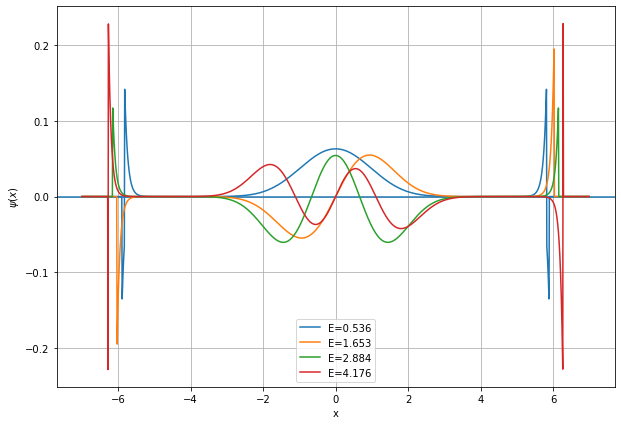

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def potential(x):
    return x**2/2+x**4/20

def initialize_psi(N,dx,parity='even'):
    # intialize wave function
    psi = np.zeros(N)

    if parity == 'even':
        # initial condition of even partiy solution
        psi[0] = 1
        psi[1] = psi[0]
    else:
        # initial condition of odd partiy solution
        psi[0] = 0
        psi[1] = dx
    return psi

def shooting(E, parity, dx=0.01, dE=0.01, b=2):
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    x = np.arange(0, 7+dx, dx)
    N = len(x)

    #parity = 'even'# even partiy solution
    #partiy = 'odd' # odd partiy solution
    psi = initialize_psi(N,dx,parity);    

   
    tol = 0.5e-10   # stopping criterion, if wave function converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    while True:
        for i in range(2,N-2):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1])) * psi[i-1] * dx2
            if abs(psi[i]) > b:
                 break

        if abs(dE) < tol:
            break

        if psi[i] * last_diverge < 0:
            dE = -dE / 2
        E = E + dE
        last_diverge = np.sign(psi[i])
    
    xi = np.concatenate([-x[-1:0:-1],x])                   

    if psi[0] == 0:
        psii = np.concatenate([-psi[-1:0:-1],psi])
    else:
        psii = np.concatenate([psi[-1:0:-1],psi])
    psii = psii / np.sqrt(np.sum(psii * psii)) # normalisation
    return E,xi,psii

def shooting_app():
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.1
    
    for n in range(0,2):
        E,x,psi = shooting(E_init,'even')
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
        
        E,x,psi = shooting(E_init,'odd')
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
        
        E_init = E + DeltaE
    
    plt.legend()
    
if __name__ == '__main__':
    #test_wavefunction()
    shooting_app()

#### 5. (Optional) Apply the matching method to obtain the energy eigenvalues and wave functions for the ground state and the first few excited states for the one-dimensional Lennard-Jones potential, which is given as
$$
V(x)=4\epsilon\left[\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right]
$$
#### with $\epsilon=10$ and $\sigma=1$. The integrations can be started at $x_L=0.5$ (on the left) and $x_R=5$ (on the right) with $\Delta x=0.01$. The matching point shall be chosen near the minimum of the potential because the absolute value of wave function approaches its maximum there.

（沈星辰）

E = 0.396, normalizatoin = 1.00000
E = 1.606, normalizatoin = 1.00000
E = 3.517, normalizatoin = 1.00000
E = 6.066, normalizatoin = 1.00000
E = 9.227, normalizatoin = 1.00000


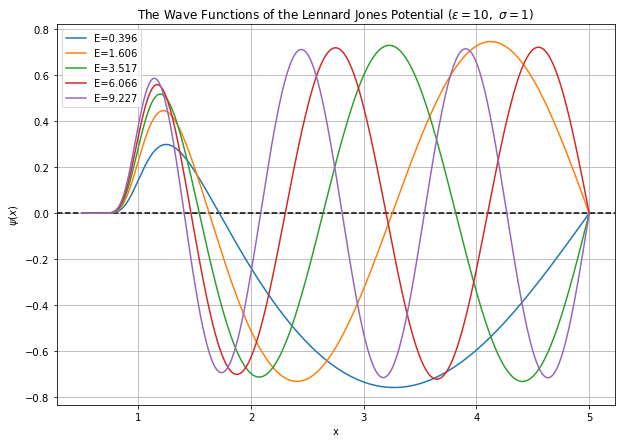

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def potential(x, epsilon=10, sigma=1):
    return 4 * epsilon * ((sigma / x)**12 - (sigma / x)**6)

def initialize_psi(N):
    # intialize wave function
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

def Lennard_Jones_matching(n=0,E=0,dx=0.01, dE=0.1):
    # energy level n=0,1,2...
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    xL = 0.5
    xR = 5
    
    x = np.arange(xL, xR+dx, dx)
    
    N = len(x)

    psi = initialize_psi(N);    

   
    tol = 0.5e-6   # stopping criterion, if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    
    #matching_index = np.argmin(potential(x))
    matching_index = 240
    
    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1])) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - potential(x[i+1])) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi * dx)) # normalisation
    
    return E,x,psi

def Lennard_Jones_matching_app():
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline(linestyle='--', color='black')
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.05
    dx=0.01
    
    for n in range(0,5):
        
        E,x,psi = Lennard_Jones_matching(n, E_init, dx=0.01, dE=0.1)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi*dx)))
                
        E_init = E + DeltaE
    
    plt.legend()
    plt.title(r'The Wave Functions of the Lennard Jones Potential ($\epsilon=10,\ \sigma=1$)')
    
if __name__ == '__main__':
    Lennard_Jones_matching_app()

#### 8. One way to calculate $\pi$ is by randomly throwing a dart into the unit square defined by $x \in [0, 1]$ and $y\in [0, 1]$ in the $xy$ plane. The chance of the dart landing inside the unit circle centered at the origin of the coordinates is $\pi/4$, from the comparison of the areas of one quarter of the circle and the unit square. Write a program to calculate $\pi$ in such a manner.

（沈星辰）

In [15]:
import numpy as np
from numpy.random import random
from numpy.linalg import norm

N = 1000000

a = random([N,2])
j = norm(a, axis=1)

print('pi =', np.sum(j<1) / N * 4)

pi = 3.141504
